<a href="https://colab.research.google.com/github/ckruckenberg/css_basecamp_k2/blob/master/W40Wed_Exercise_Musterl%C3%B6sung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises: HTML and scraping
**Wednesday, September 29, 2020**

You fingers should now be iching for some new data to play with. And guess what? The Internet is full of it! Every **website** you can imagine can be **turned into a dataset** for analysis and you will now learn how to do this.

## 1. HTML

It all starts with learning a little about the language of the World Wide Web. **HTML is the** ***markup language*** **used by web pages**. It's ubiquitous on the web; even when editing this notebook you are interacting with HTML (right click and hit "View Page Source" if you need proof). Here follows some exercises to get you comfortable with navigating HTML on web pages.

> **Problem 1**: Right click inside the cell below and hit "Inspect". This should launch the "Inspector" tool in your browser, showing you where the element that renders the cell sits inside the DOM.
1. How deeply is it nested? Are there any sibling elements?
2. What happens when you update it? Change the text and see for yourself.
>
> *Hint: Most modern browsers (e.g. Firefox, Chrome, Brave) will let you hover elements in the DOM to show where they display on the web page.*

> **Problem 2**: In the HTML code below:
1. What is typically the use of the `<p>`, `<h1>` and `<h2>` tags? Look them up, what are they for?
2. What are the attributes of the `div` element?
3. Create a text file that ends with ".html" and open it in a browser.

    <html>
    <body>

    <div width=200 height=100 id="main">
        <h1>This is the main title of the webpage</h1>
        <h2>This is a sub-heading</h2>
        <p>This is a paragraph of text.</p>
    </div>

    <h2>This is another sub-heading</h2>
    <p>This is a paragraph of text with some words in bold.</p>
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FkFgzrTt798d2w%2Fgiphy.gif&f=1&nofb=1" width="493" height="340">
    <p>And that just above is an image.</p>

    </body>
    </html>


> **Problem 3**: Using the `requests` module, download [this web page](https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=1). Print the first 25 lines of the html string. How many lines are there in total?
>
> *Hint: use the `requests.get` method. To figure out how it works, execute `?requests.get` (after importing `requests`), this displays the module documentation.*

In [ ]:
import requests as rq

html = rq.get('https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=1').text

In [ ]:
for line in html.split('\n')[:25]:
  print(line)

<!DOCTYPE html><html lang="en"><head>
  <!-- Google Tag Manager -->
  <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-PWD5VZT');
  </script>
  <!-- End Google Tag Manager -->

  <meta charset="utf-8">
  <meta name="description" content="Se alle ejerlejligheder til salg i 2200 København N, salgspriser m.m. på Danmarks største uafhængige boligside.">
  <meta name="keywords" content="">

  <title>Alle 118 ejerlejligheder til salg i 2200 København N </title>
  <base href="/">
  <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0">
  <link rel="icon" type="image/x-icon" href="favicon.ico">
  <link rel="apple-touch-icon" sizes="180x180" href=

In [ ]:
# alternative
print("\n".join(html.split('\n')[:25]))

<!DOCTYPE html><html lang="en"><head>
  <!-- Google Tag Manager -->
  <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-PWD5VZT');
  </script>
  <!-- End Google Tag Manager -->

  <meta charset="utf-8">
  <meta name="description" content="Se alle ejerlejligheder til salg i 2200 København N, salgspriser m.m. på Danmarks største uafhængige boligside.">
  <meta name="keywords" content="">

  <title>Alle 118 ejerlejligheder til salg i 2200 København N </title>
  <base href="/">
  <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0">
  <link rel="icon" type="image/x-icon" href="favicon.ico">
  <link rel="apple-touch-icon" sizes="180x180" href=

In [ ]:
# how `join` works:
tmp = [str(v) for v in [1, 2, 3]]
tmp = map(str, [1, 2, 3])
print("\n".join(tmp))

1
2
3


In [ ]:
# how many lines in total?
len(html.split('\n'))

40

## 2 Scraping

*Scraping* means to take some HTML code and collect the important pieces of information inside of it. *Crawling* is
another important contect, and the word refers to **automatically** sifting through pages of the web and scraping
information on each page. 90% of scraping and crawling work can be done using the two modules `requests` and
`BeautifulSoup`.

> **Problem 4:** Load the example HTML code from Problem 2 using BeautifulSoup. Use the [documentation page](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for reference on how to do this.
1. Access the `h1` element inside the `div` and print out its content (which is "This is the main title of the webpage").
2. Get the value of the `src` attribute inside the `img` element.
3. Get the second subheading that contains "This is another sub-heading" and print out that content.
4. Get the `div` element by searching for its id.

In [ ]:
html = """<html>
<body>
 
<div width=200 height=100 id="main">
    <h1>This is the main title of the webpage</h1>
    <h2>This is a sub-heading</h2>
    <p>This is a paragraph of text.</p>
</div>
 
<h2>This is another sub-heading</h2>
<p>This is a paragraph of text with some words in bold.</p>
<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FkFgzrTt798d2w%2Fgiphy.gif&f=1&nofb=1" width="493" height="340">
<p>And that just above is an image.</p>
 
</body>
</html>"""

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# Problem 4.1
print(soup.h1.text)

This is the main title of the webpage


In [ ]:
# Problem 4.2
print(soup.img['src'])

https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FkFgzrTt798d2w%2Fgiphy.gif&f=1&nofb=1


In [ ]:
# Problem 4.3
print(soup.find_all('h2')[1].text)

This is another sub-heading


In [ ]:
# Problem 4.4
soup.find(id='main').text 

['',
 'This is the main title of the webpage',
 'This is a sub-heading',
 'This is a paragraph of text.',
 '']

> **Problem 5:** Load the HTML you downloaded in Problem 3. For each post, extract price, square meter size and "Ejerudgift". You should create three different lists that contain each variable across posts.

In [ ]:
html = rq.get('https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=1').text

soup = BeautifulSoup(html, 'html.parser')

In [ ]:
import re
from tqdm import tqdm

# extract house list items
house_list_items = soup.find_all('a', {'class': 'house-list-item'})

# create empty lists for data storage
prices = []
ejerudgifter = []

# loop over house list items
for house_item in tqdm(house_list_items):
  price_text = house_item.find('div', {'class': 'primary-value d-flex justify-content-end'}).text

  # get price
  price = re.findall(r'\d*\.?\d*\.\d{3}', price_text)[0]
  price = int(price.replace(".", ""))

  # ejerudgift
  try:
    ejerudgift = re.findall(r'Ejerudgift: \d*\.?\d+', house_item.text)[0]
    ejerudgift = ejerudgift.replace('Ejerudgift: ', '')
    ejerudgift = int(ejerudgift.replace('.', ''))
  except IndexError:
    print("nope")
    continue

  if ejerudgift == 0:
    continue

  # save data
  prices.append(price)
  ejerudgifter.append(ejerudgift)
  

100%|██████████| 52/52 [00:00<00:00, 1297.39it/s]

nope
nope


> **Problem 6:** Make a scatter plot of square meter size vs. extracted price. Then make a new variable that 
measures price per square meter and scatter plot this against "Ejerudgift". Can you say anything about how
"Ejerudgift" influences square meter price?

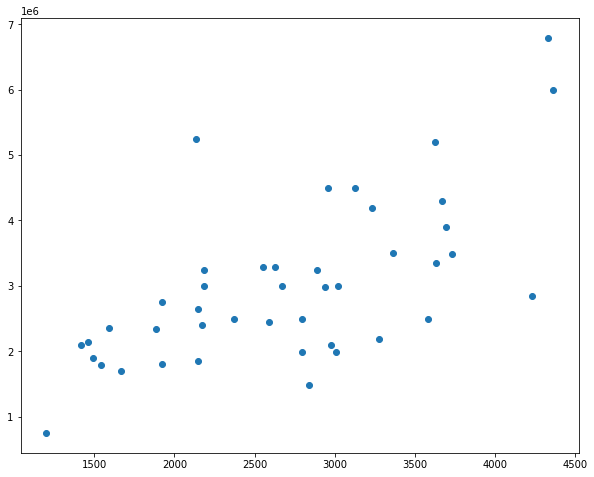

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

plt.figure(figsize=(10, 8))
plt.scatter(ejerudgifter, prices)
plt.show()

> **Extra:** Crawl over pages of Boliga to collect this data for the entire borough of Nørrebro. Or all of Copenhagen! Or Denmark!? You can also make multiple runs and make different plots for each part of the country to note differences. You set your limits here.

In [ ]:
# create empty lists for data storage
prices = []
ejerudgifter = []

for page_number in tqdm(range(10), total=10):

  html = rq.get(f'https://www.boliga.dk/resultat?propertyType=3&page={page_number}').text

  soup = BeautifulSoup(html, 'html.parser')

  # extract house list items
  house_list_items = soup.find_all('a', {'class': 'house-list-item'})

  # loop over house list items
  for house_item in house_list_items:
    price_text = house_item.find('div', {'class': 'primary-value d-flex justify-content-end'}).text

    # get price
    price = re.findall(r'\d*\.?\d*\.\d{3}', price_text)[0]
    price = int(price.replace(".", ""))

    # ejerudgift
    try:
      ejerudgift = re.findall(r'Ejerudgift: \d*\.?\d+', house_item.text)[0]
      ejerudgift = ejerudgift.replace('Ejerudgift: ', '')
      ejerudgift = int(ejerudgift.replace('.', ''))
    except IndexError:
      print("nope")
      continue

    if ejerudgift == 0:
      continue

    # save data
    prices.append(price)
    ejerudgifter.append(ejerudgift)
    

100%|██████████| 10/10 [00:20<00:00,  2.01s/it]


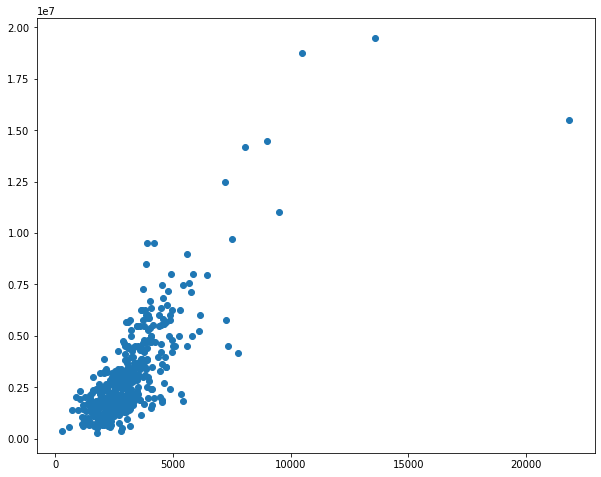

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

plt.figure(figsize=(10, 8))
plt.scatter(ejerudgifter, prices)
plt.show()

> **Reflection:** What did you just learn? Housing prices may not be your biggest passion, but using this as example of what you can do with your new powers, **take a moment to discuss what other datasets you can now acquire** and analyse. What doors previously inaccessible knowledge about the world does this skill unlock?